In [2]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment, Stack
from modules.stack_selection import MultiPathSelector, LayerSelector
from matplotlib.backends.backend_pdf import PdfPages

%reload_ext autoreload
%autoreload 2

In [3]:
# Load paths to each set of experiments
loc = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/'
control_folder = 'control/stacks'
mutant_folder = 'perturbation/stacks'

paths = {
    'wt_clones_eye29_12_50': os.path.join(loc, control_folder, 'CONTROLS-NO-YanAllele_DAPI_w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mR....lif - w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_Disc29c.tif'),
    'wt_clones_eye31_12_50': os.path.join(loc, control_folder, 'CONTROLS-NO-YanAllele_DAPI_w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mR....lif - w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_Disc31c.tif'),
    'eye6_12_50': os.path.join(loc, mutant_folder, 'DAPI_w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_S...w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_Disc6b.tif'),
    'eye36_12_50': os.path.join(loc, mutant_folder, 'DAPI_w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_C...-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_Disc36e.tif'),
    'eye37_12_50': os.path.join(loc, mutant_folder, 'DAPI_w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_C...-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_Disc37e.tif'),
    'eye54': os.path.join(loc, mutant_folder, 'w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A_Disc54b.tif')
}

disc_names = {29: 'wt_clones_eye29_12_50',
             31: 'wt_clones_eye31_12_50',
             6: 'eye6_12_50',
             36: 'eye36_12_50',
             37: 'eye37_12_50',
             54: 'eye54'}

layers = {29: [41, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 56],
     31: [29, 30, 32, 33, 37, 38, 40, 49],
 36: [19,20,29,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54],
 37: [38, 40, 42, 43, 45, 46, 48],
 6: [44, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 60, 62, 66],
 54: [27, 29, 32, 34, 35, 36, 37, 38, 39, 40, 41, 43, 49, 50, 51, 56, 57, 61]}

offsets = {29: 7,
          31: 1,
          6: 3,
          36: 0,
          37: 10,
          54: 0}

bits = {29: 2**12,
          31: 2**12,
          6: 2**12,
          36: 2**12,
          37: 2**12,
          54: 2**8}

In [3]:
disc_id = 36

# load stack
annotated_layers = np.array(layers[disc_id]) - offsets[disc_id]
stack_path = paths[disc_names[disc_id]]
stack = Stack(stack_path, bits=bits[disc_id])

print(annotated_layers)

[19 20 29 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53 54]


In [8]:
# take median layer
layer_id = np.median(annotated_layers).astype(int)
layer = stack.get_layer(layer_id)

In [7]:
"""
NEED TO ADD THE OFFSETS BACK INTO EACH DISC


"""

In [4]:
# sel = MultiPathSelector(disc_id, layer, figsize=(10,5))
# sel.connect()

In [6]:
from modules.stack_selection import LayerSelector
%matplotlib notebook 

In [7]:
disc_id = 29

# load stack
annotated_layers = np.array(layers[disc_id]) - offsets[disc_id]
stack_path = paths[disc_names[disc_id]]
stack = Stack(stack_path, bits=bits[disc_id])

print(annotated_layers)

[34 36 37 38 39 41 42 43 44 45 47 49]


<IPython.core.display.Javascript object>


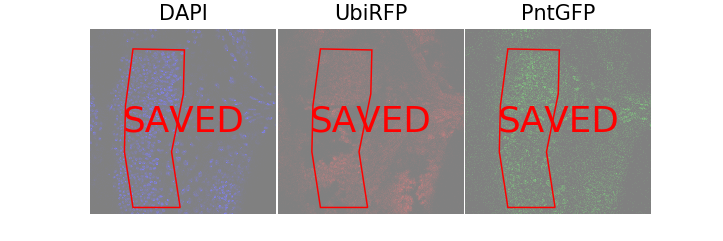

In [61]:
layer_id = 48
layer = stack.get_layer(layer_id)
sel = LayerSelector(disc_id, layer, figsize=(15, 5))
sel.connect()

In [60]:
bounds = (36, 39)
copy_to = [l for l in annotated_layers if (l>=bounds[0] and l<=bounds[1] and l != layer_id)]

copy_file(sel, layer_id, copy_to)

In [4]:
def copy_file(sel, layer_from, layers_to):
    disc_dir = os.path.join(sel.selection_path, os.pardir)
    for layer_id in layers_to:
        layer_path = os.path.join(disc_dir, str(layer_id))
        if not os.path.exists(layer_path):
            os.mkdir(layer_path)
        file_from = os.path.join(sel.selection_path, 'selection.npy')
        file_to = os.path.join(layer_path, 'selection.npy')
        shutil.copy(file_from, file_to)
    

In [5]:
import shutil

In [17]:
sel.save()

In [16]:
sel.selection_path

'./stack_selection/36/19'

In [13]:
disc_id

6

In [9]:
sel.disconnect()

# Write all images to PDF

<IPython.core.display.Javascript object>


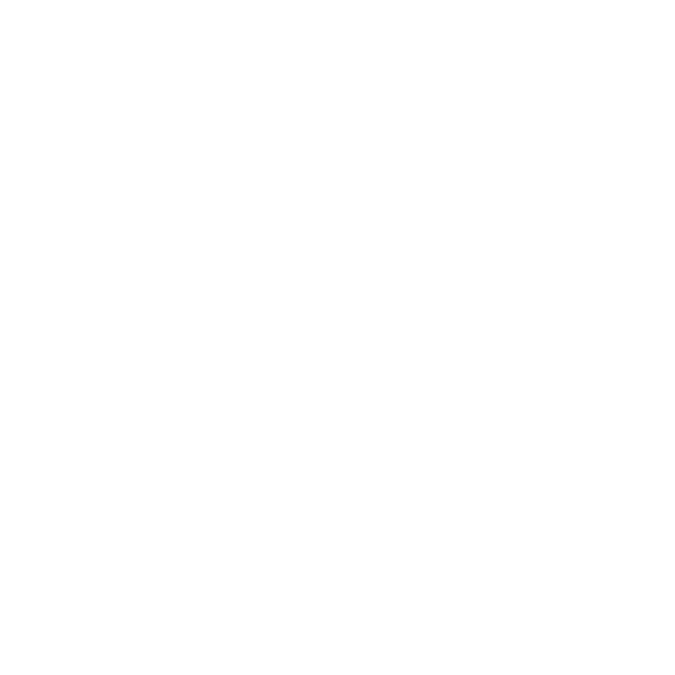

<IPython.core.display.Javascript object>


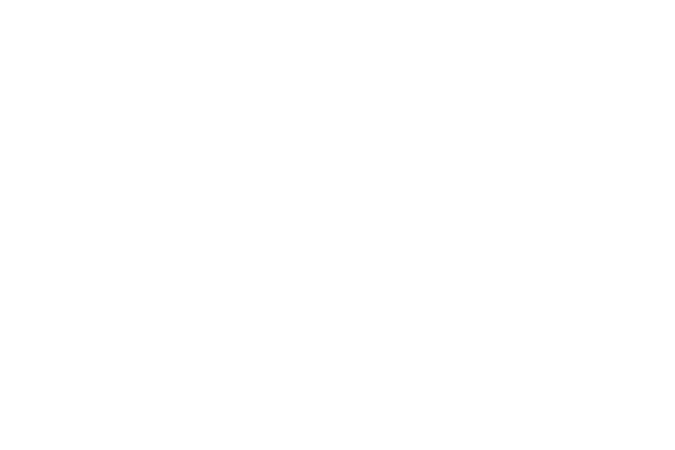

<IPython.core.display.Javascript object>

In [ ]:
# write all images to PDF
for exp_name, exp in experiments.items():    
    with PdfPages(exp_name+'.pdf') as pdf:
        for stack in exp:
            sel = StackSelector.load(stack)
            pdf.savefig(sel.fig, dpi=150)
            sel.fig.clf()
            plt.close(sel.fig)